**Ex.1**

The ``min`` method for the *UnsortedPriorityQueue* class executes in O(n) time. Give a simple modification to the class so
that ``min`` runs in O(1) time. Explain any necessary modifications to other methods of the class.



In [38]:
class PriorityQueueBase:
    """Abstract base class for a priority queue."""

    class _Item:
        """Store priority queue items."""
        __slots__ = '_key' , '_value'

        def __init__(self, k, v):
            self._key = k
            self._value = v

        def __lt__(self, other):
            return self._key < other._key # compare items based on their keys

    def is_empty(self):                   # concrete method assuming abstract len
        """Return True if the priority queue is empty."""
        return len(self) == 0

In [39]:
class _DoublyLinkedBase:
    """A base class providing a doubly linked list representation."""

    class _Node:
        """Lightweight, nonpublic class for storing a doubly linked node."""
        __slots__ = '_element' , '_prev' , '_next' # streamline memory
        def __init__(self, element, prev, next): # initialize node’s fields
            self._element = element # user’s element
            self._prev = prev # previous node reference
            self._next = next # next node reference

    def __init__(self):
        """Create an empty list."""
        self._header = self._Node(None, None, None)
        self._trailer = self._Node(None, None, None)
        self._header._next = self._trailer # trailer is after header
        self._trailer._prev = self._header # header is before trailer
        self._size = 0 # number of elements

    def __len__(self):
        """Return the number of elements in the list."""
        return self._size

    def is_empty(self):
        """Return True if list is empty."""
        return self._size == 0
    
    def insert_between(self, e, predecessor, successor):
        """Add element e between two existing nodes and return new node."""
        newest = self._Node(e, predecessor, successor) # linked to neighbors
        predecessor._next = newest
        successor._prev = newest
        self._size += 1
        return newest

    def delete_node(self, node):
        """Delete nonsentinel node from the list and return its element."""
        predecessor = node._prev
        successor = node._next
        predecessor._next = successor
        successor._prev = predecessor
        self._size -= 1
        element = node._element # record deleted element
        node._prev = node._next = node._element = None # deprecate node
        return element # return deleted element
    

In [104]:
class PositionalList(_DoublyLinkedBase):
    """A sequential container of elements allowing positional access."""

    #-------------------------- nested Position class --------------------------
    class Position:
        """An abstraction representing the location of a single element."""

        def __init__ (self, container, node):
            """Constructor should not be invoked by user."""
            self._container = container
            self._node = node

        def element(self):
            """Return the element stored at this Position."""
            return self._node._element

        def __eq__(self, other):
            """Return True if other is a Position representing the same location."""
            return type(other) is type(self) and other._node is self._node

        def __ne__(self, other):
            """Return True if other does not represent the same location."""
            return not (self == other) # opposite of eq
        
    #------------------------------- utility method -------------------------------
    def _validate(self, p):
        """Return position s node, or raise appropriate error if invalid."""
        if not isinstance(p, self.Position):
            raise TypeError('p must be proper Position type')
        if p._container is not self:
            raise ValueError('p does not belong to this container')
        if p._node._next is None: # convention for deprecated nodes
            raise ValueError('p is no longer valid')
        return p._node
    
    #------------------------------- utility method -------------------------------
    def _make_position(self, node):
        """Return Position instance for given node (or None if sentinel)."""
        if node is self._header or node is self._trailer:
            return None # boundary violation
        else:
            return self.Position(self, node) # legitimate position
        
        
    #------------------------------- accessors -------------------------------
    def first(self):
        """Return the first Position in the list (or None if list is empty)."""
        return self._make_position(self._header._next)

    def last(self):
        """Return the last Position in the list (or None if list is empty)."""
        return self._make_position(self._trailer._prev)

    def before(self, p):
        """Return the Position just before Position p (or None if p is first)."""
        node = self._validate(p)
        return self._make_position(node._prev)

    def after(self, p):
        """Return the Position just after Position p (or None if p is last)."""
        node = self._validate(p)
        return self._make_position(node._next)

    def __iter__(self):
        """Generate a forward iteration of the elements of the list."""
        cursor = self.first( )
        while cursor is not None:
            yield cursor.element( )
            cursor = self.after(cursor)
            
    #------------------------------- mutators -------------------------------
    # override inherited version to return Position, rather than Node
    def _insert_between(self, e, predecessor, successor):
        """Add element e between two existing nodes and return new node."""
        newest = self._Node(e, predecessor, successor) # linked to neighbors
        predecessor._next = newest
        successor._prev = newest
        self._size += 1
        return newest

    def add_first(self, e):
        """Insert element e at the front of the list and return new Position."""
        return self._insert_between(e, self._header, self._header._next)

    def add_last(self, e):
        """Insert element e at the back of the list and return new Position."""
        return self._insert_between(e, self._trailer._prev, self._trailer)

    def add_before(self, p, e):
        """Insert element e into list before Position p and return new Position."""
        original = self._validate(p)
        return self._insert_between(e, original._prev, original)

    def add_after(self, p, e):
        """Insert element e into list after Position p and return new Position."""
        original = self._validate(p)
        return self._insert_between(e, original, original._next)
    
    def delete(self, p):
        """Remove and return the element at Position p."""
        original = self._validate(p)
        return self._delete_node(original) # inherited method returns element

    def replace(self, p, e):
        """Replace the element at Position p with e.

        Return the element formerly at Position p.
        """
        original = self._validate(p)
        old_value = original._element # temporarily store old element
        original._element = e # replace with new element
        return old_value # return the old element value

In [135]:
class UnsortedPriorityQueue(PriorityQueueBase): # base class defines Item
    """A min-oriented priority queue implemented with an unsorted list."""

    
    ### Modification ####
    
    def _find_min(self): # nonpublic utility
        """Return Position of item with minimum key."""
        if self.is_empty( ): # is empty inherited from base class
            raise Empty("Priority queue is empty")
        small = self._data.first()
        return small
    

    
    def __init__(self):
        """Create a new empty Priority Queue."""
        self._data = PositionalList()

    def __len__(self):
        """Return the number of items in the priority queue."""
        return len(self._data)

    
    
    ### Modification ####
    
    def add(self, key, value):
        """Add a key-value pair."""
        newPair = self._Item(key, value) 
        step = self._data.first()        
        while step is not None and newPair > step.element( ):
            step = self._data.after(step)
        if step is None:
            self._data.add_last(newPair)      
        else:
            self._data.add_before(step,newPair) 
    
    
    
    def min(self):
        """Return but do not remove (k,v) tuple with minimum key."""
        p = self._find_min()
        item = p.element()
        return (item._key, item._value)

    def remove_min(self):
        """Remove and return (k,v) tuple with minimum key."""
        p = self._find_min()
        item = self._data.delete(p)
        return (item._key, item._value)

In [138]:
D= UnsortedPriorityQueue()
D.add(5,'egg')
D.add(4,'milk')
D.add(1, 'potato')
D.add(3, 'butter')

In [139]:
D.min()

(1, 'potato')

For 'min' function running in O(1) time, I modified 'add' method so that it could be sorted whenever element is added, and we can get the first element as the smallest key. And also I modified '_ find_min' function to get the first node.
These make 'min' method have O(1) running time.

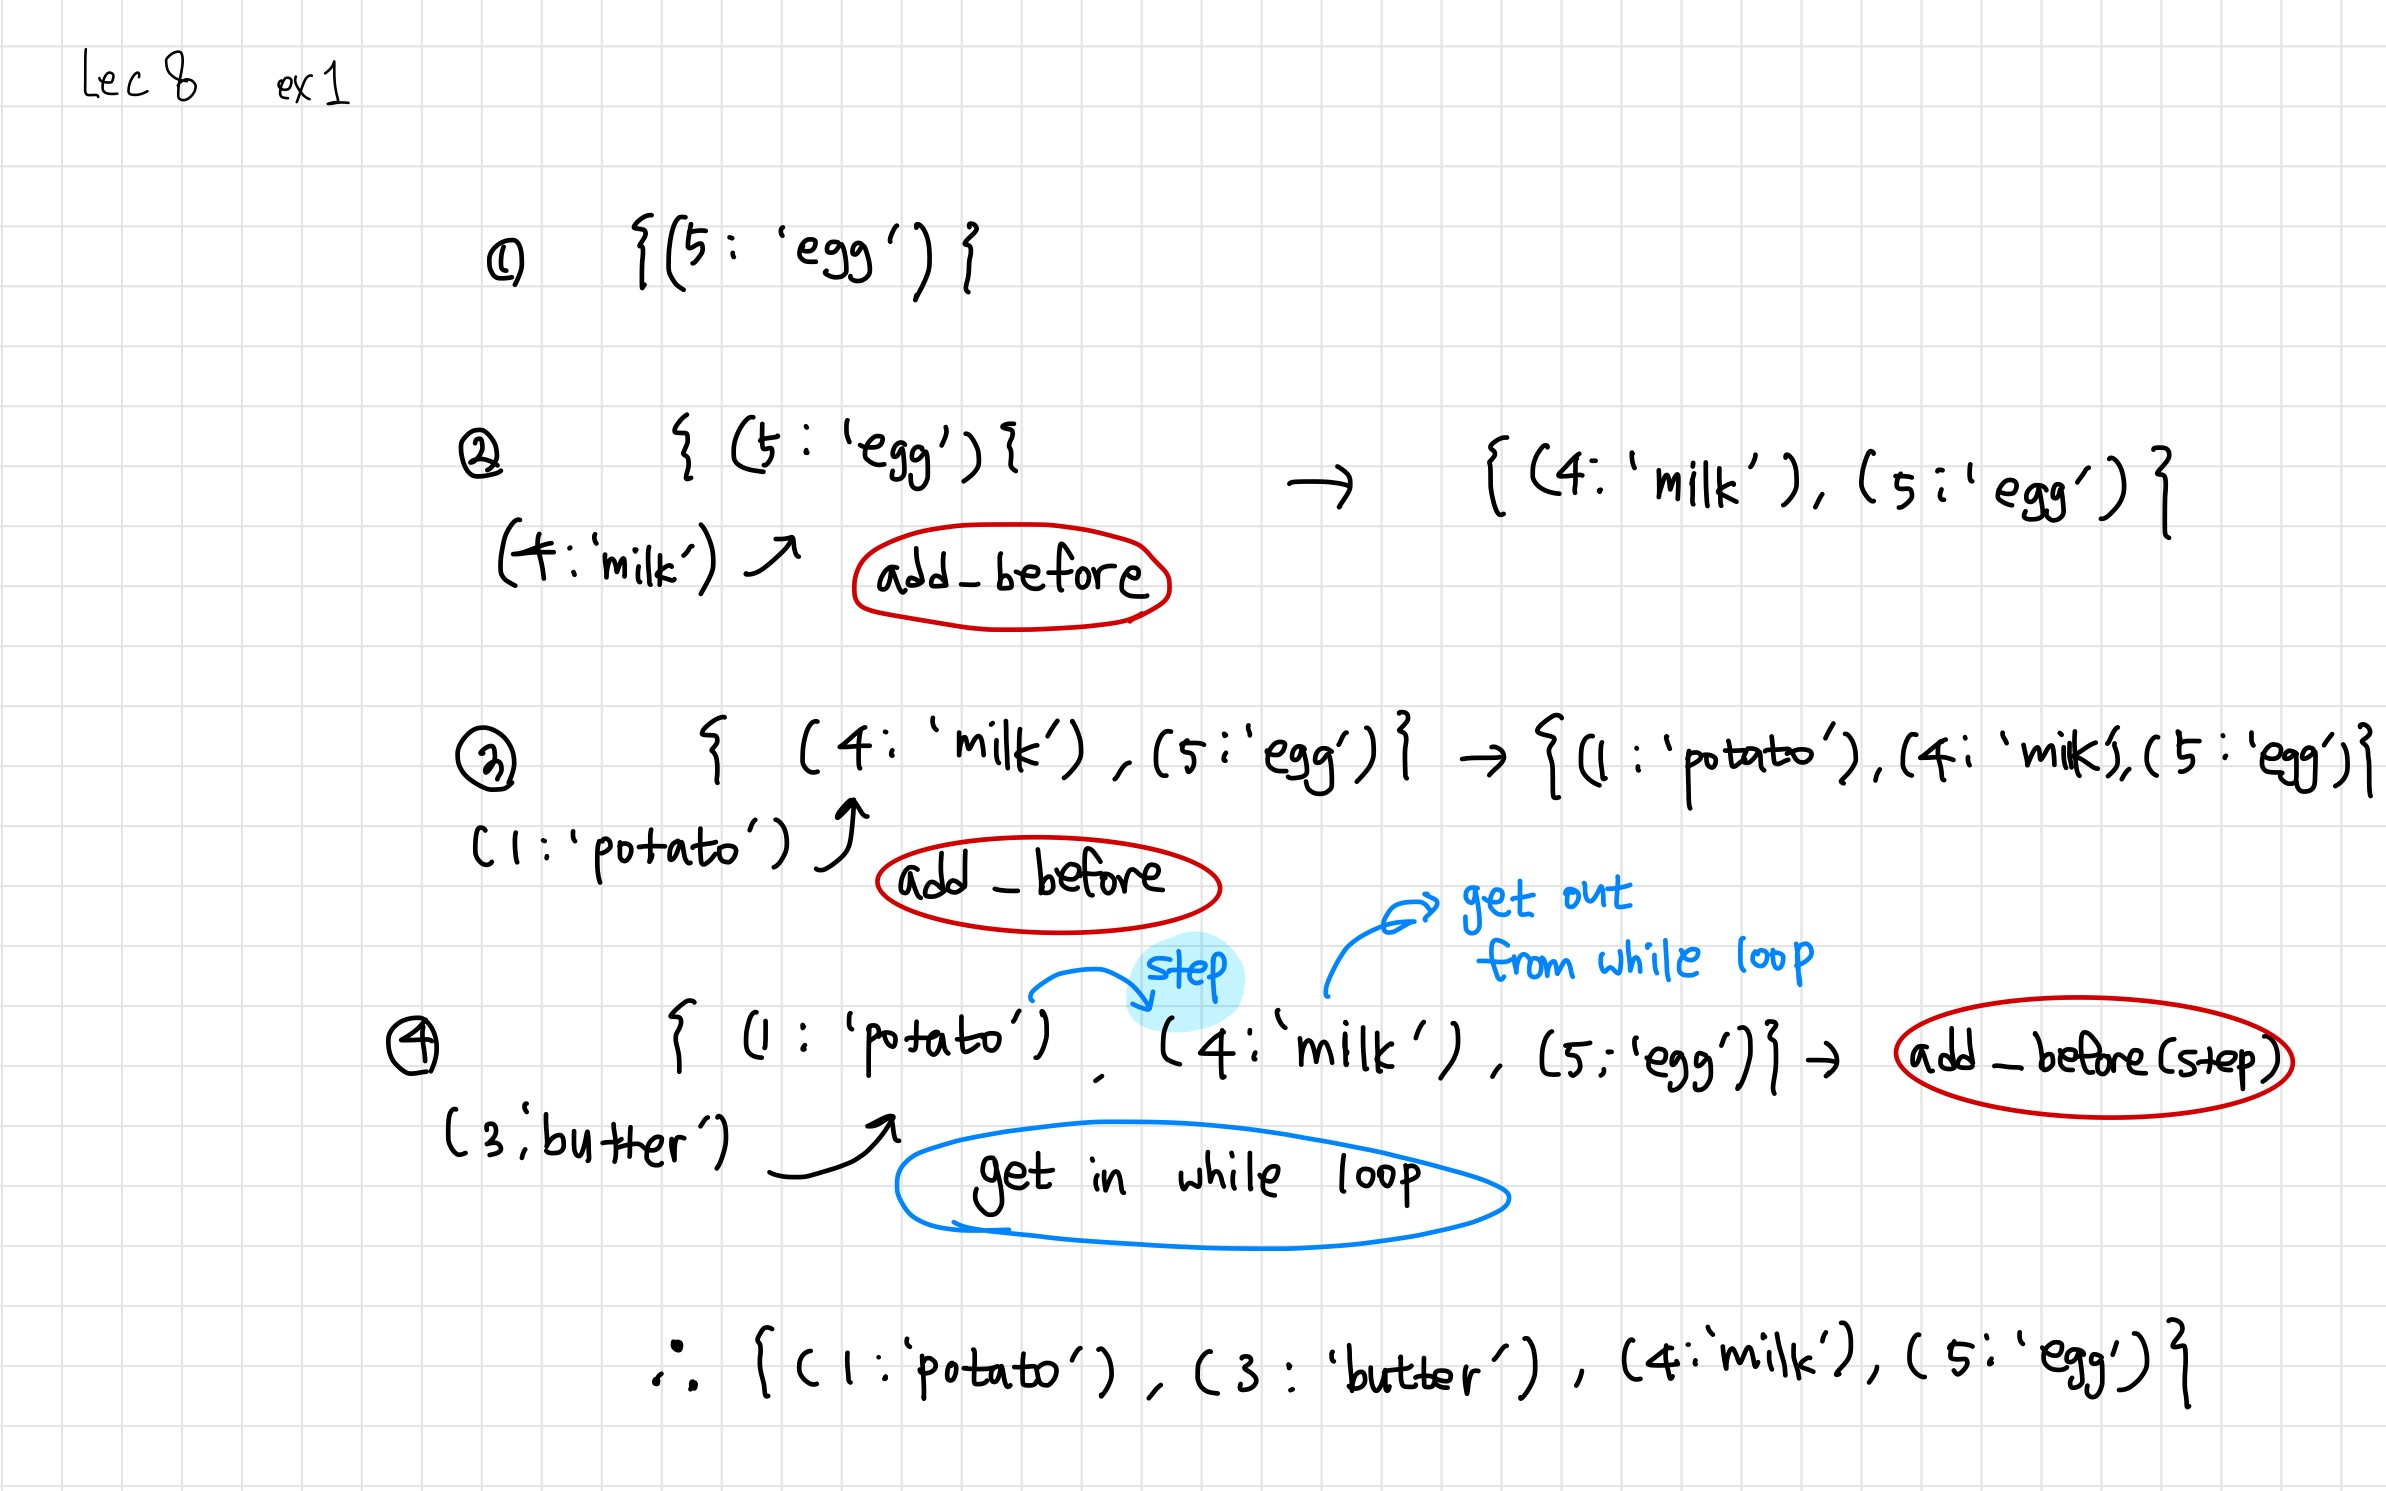

In [141]:
from IPython.display import Image
Image("algorithm-9.jpg")